In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [3]:
raw_data = pd.read_csv('15 Student_Performance.csv')

In [4]:
raw_data.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [5]:
#the data is clean, so we won't need preprocessing

In [6]:
data = raw_data

In [7]:
#Checking OLS Assumptions

Text(0.5, 1.0, 'Sample Question and Performance Index')

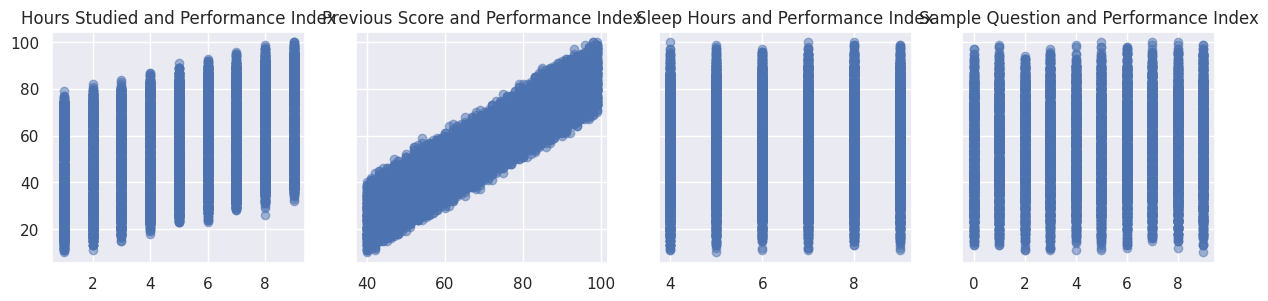

In [12]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,3))
ax1.scatter(data['Hours Studied'], data['Performance Index'], alpha=0.5)
ax1.set_title('Hours Studied and Performance Index')
ax2.scatter(data['Previous Scores'], data['Performance Index'], alpha=0.5)
ax2.set_title('Previous Score and Performance Index')
ax3.scatter(data['Sleep Hours'], data['Performance Index'], alpha=0.5)
ax3.set_title('Sleep Hours and Performance Index')
ax4.scatter(data['Sample Question Papers Practiced'], data['Performance Index'], alpha=0.5)
ax4.set_title('Sample Question and Performance Index')

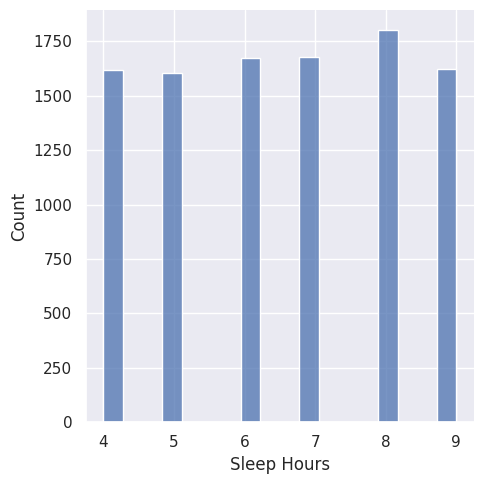

In [9]:
sns.displot(data['Sleep Hours'])

In [10]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [13]:
data.columns.values

array(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced',
       'Performance Index'], dtype=object)

In [15]:
#Check Multicollinearity with VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
variables = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [18]:
vif

,VIF,Features
0,4.248789,Hours Studied
1,9.866227,Previous Scores
2,9.736833,Sleep Hours
3,3.340441,Sample Question Papers Practiced


In [19]:
# VIF < 10, the features is okay 

In [20]:
# Create dummy values for categorical features

In [21]:
data_with_dummies = pd.get_dummies(data, drop_first=True)
data_with_dummies.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [22]:
#Rearrange dataset

In [23]:
data_with_dummies.columns.values

array(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities_Yes'], dtype=object)

In [24]:
cols = ['Performance Index', 'Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced',
       'Extracurricular Activities_Yes']

In [25]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Performance Index,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,91.0,7,99,9,1,1
1,65.0,4,82,4,2,0
2,45.0,8,51,7,2,1
3,36.0,5,52,5,2,1
4,66.0,7,75,8,5,0


In [26]:
##Linear Regression

In [27]:
#Declare inputs and the targets

In [28]:
targets = data_preprocessed['Performance Index']
inputs = data_preprocessed.drop(['Performance Index'], axis=1)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [30]:
input_scaled = scaler.transform(inputs)

In [31]:
#Train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

In [34]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [35]:
y_hat = reg.predict(x_train)

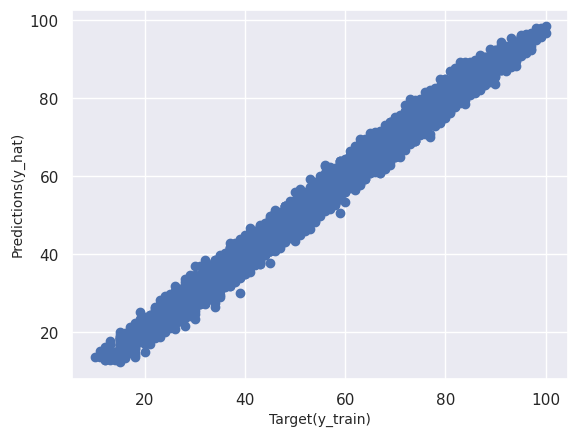

In [37]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target(y_train)', fontsize=10)
plt.ylabel('Predictions(y_hat)', fontsize=10)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

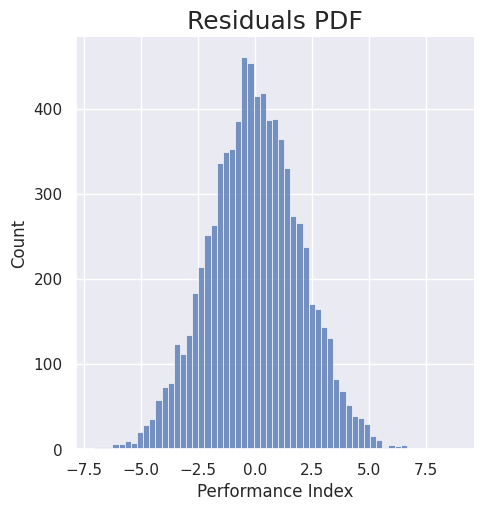

In [38]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [39]:
#calculate R-squared

In [40]:
reg.score(x_train, y_train)

0.9887657191394897

In [41]:
#Finding weight and bias

In [43]:
reg.intercept_

55.22142150761015

In [45]:
reg.coef_

array([ 7.38299723, 17.68518489,  0.8071689 ,  0.55387358,  0.31209564])

In [46]:
reg.summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg.summary['Weights'] = reg.coef_
reg.summary

,Features,Weights
0,Hours Studied,7.382997
1,Previous Scores,17.685185
2,Sleep Hours,0.807169
3,Sample Question Papers Practiced,0.553874
4,Extracurricular Activities_Yes,0.312096


In [47]:
#Testing

In [48]:
y_hat_test = reg.predict(x_test)

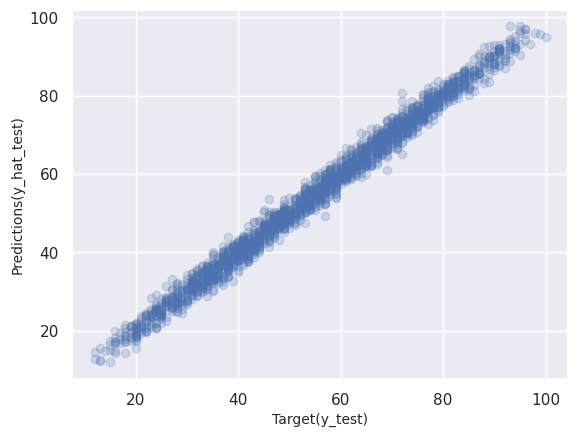

In [49]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target(y_test)', fontsize=10)
plt.ylabel('Predictions(y_hat_test)', fontsize=10)
plt.show()

In [54]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf.head()

,Predictions
0,78.512613
1,58.668845
2,51.978165
3,79.389612
4,63.164563


In [58]:
df_pf['Target'] = (y_test)
df_pf.head()

,Predictions,Target
0,78.512613,72.0
1,58.668845,58.0
2,51.978165,56.0
3,79.389612,79.0
4,63.164563,64.0
